In [4]:
import pymysql
import os
import pandas as pd

# Database connection
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="Rsa61188",
    database="ecommerce",
    local_infile=1
)
cursor = conn.cursor()

folder_path = r'C:\Users\Rahil Shaikh\Desktop\desktop\Portfolio Project\project one'
csv_files = [
    ('customers.csv', 'customer'),
    ('orders.csv', 'orders'),
     ('order_items.csv', 'orders_items'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments')
]

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file).replace('\\', '/')
    print(f"\n➡ Importing '{csv_file}' into `{table_name}`...")

    # Step 1: Read first row of CSV to get column names
    df = pd.read_csv(file_path, nrows=0)
    columns = df.columns
    columns_clean = [col.strip().replace(' ', '_').replace('-', '_').replace('.', '_') for col in columns]

    # Step 2: Create table if it doesn't exist
    col_definitions = ", ".join([f"`{col}` TEXT" for col in columns_clean])
    create_query = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({col_definitions});"
    cursor.execute(create_query)
    conn.commit()

    # Step 3: Import CSV using LOAD DATA LOCAL INFILE
    try:
        query = f"""
        LOAD DATA LOCAL INFILE '{file_path}'
        INTO TABLE `{table_name}`
        FIELDS TERMINATED BY ',' 
        ENCLOSED BY '"' 
        LINES TERMINATED BY '\\n'
        IGNORE 1 ROWS;
        """
        cursor.execute(query)
        conn.commit()
        print(f"✅ Imported {csv_file} successfully")
    except Exception as e:
        print(f"❌ Error importing {csv_file}: {e}")

cursor.close()
conn.close()
print("\n🎉 All CSVs imported successfully!")



➡ Importing 'customers.csv' into `customer`...
✅ Imported customers.csv successfully

➡ Importing 'orders.csv' into `orders`...
✅ Imported orders.csv successfully

➡ Importing 'order_items.csv' into `orders_items`...
✅ Imported order_items.csv successfully

➡ Importing 'sellers.csv' into `sellers`...
✅ Imported sellers.csv successfully

➡ Importing 'products.csv' into `products`...
✅ Imported products.csv successfully

➡ Importing 'geolocation.csv' into `geolocation`...
✅ Imported geolocation.csv successfully

➡ Importing 'payments.csv' into `payments`...
✅ Imported payments.csv successfully

🎉 All CSVs imported successfully!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db= mysql.connector.connect ( host= "localhost",
                              username= "root",
                              password = "Rsa61188",
                              database = "ecommerce")
cur= db.cursor()                    

# List all unique cities where customers are located. 

In [9]:
query = """ select distinct customer_city from customer """
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [4]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
print("Total orders placed in 2017 is:", data[0] [0])

Total orders placed in 2017 is: 135303


# Find the total sales per category.

In [12]:

dfquery= """ select upper(p.product_category) category,
  round(sum(pay.payment_value), 2) as total_sales 
from
  products p 
join 
  orders_items oi 
  on p.product_id = oi.product_id 
join 
  payments pay 
  on pay.order_id = oi.order_id 
group by
  p.product_category """ 
cur.execute(query) 
data = cur.fetchall() 
df = pd.DataFrame(data, columns = ["Category", "Total_sales"])

# 👇 Disable scientific notation for clarity
pd.set_option('display.float_format', '{:,.2f}'.format)


,Category,Total_sales
0,PERFUMERY,"38,005,399.50"
1,FURNITURE DECORATION,"107,263,229.25"
2,TELEPHONY,"36,516,153.75"
3,BED TABLE BATH,"128,441,525.25"
4,AUTOMOTIVE,"63,922,074.75"
...,...,...
69,CDS MUSIC DVDS,"89,957.25"
70,LA CUISINE,"218,514.75"
71,FASHION CHILDREN'S CLOTHING,"58,925.25"
72,PC GAMER,"163,082.25"


# Calculate the percentage of orders that were paid in installments.

In [12]:
query = """ select sum( case when payment_installments >=1 then 1
else 0 end)/count(*)*100 from payments """
cur.execute(query)
data = cur.fetchall()
print("the percentage of orders that were paid in installments:",data)

the percentage of orders that were paid in installments: [(Decimal('99.9981'),)]


# Count the number of customers from each state.

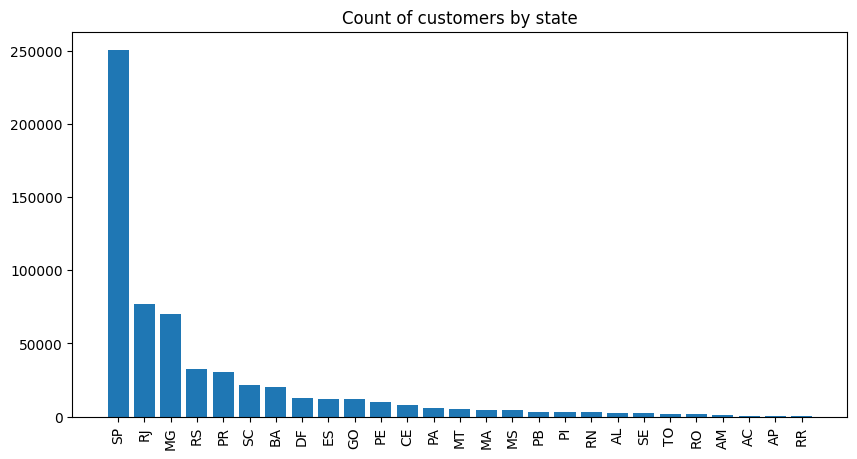

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
query = """ select customer_state, count(customer_id)
from customer group by customer_state  """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state","customers"])
plt.figure(figsize = (10,5))
df= df.sort_values(by = "customers", ascending = False)
plt.bar(df["state"], df["customers"])
plt.xticks(rotation = 90)
plt.title("Count of customers by state")
plt.show()

# Calculate the number of orders per month in 2018.

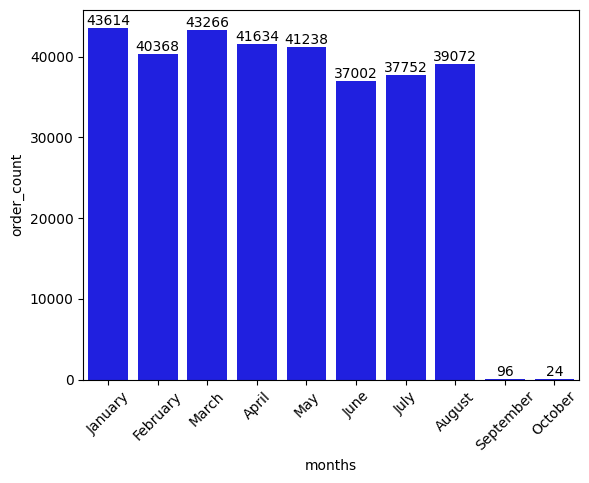

In [16]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018 
group by months  """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months","order_count"])
o =  ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]
ax = sns.barplot(x= df["months"], y =df["order_count"], data = df ,order = o, color = "blue")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])

plt.show()

  # Find the average number of products per order, grouped by customer city.

In [40]:
 query = """ with count_per_order as (select orders.order_id,orders.customer_id, count(orders_items.order_id) oc
from orders join orders_items on
 orders.order_id = orders_items.order_id
 group by orders.order_id,orders.customer_id)
 
 select customer.customer_city, avg(count_per_order.oc) from 
 customer join count_per_order 
 on customer.customer_id = count_per_order.customer_id 
 group by customer.customer_city"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer_city", "average_orders"])
df.head(10)

,Customer_city,average_orders
0,treze tilias,22.9091
1,indaial,20.0769
2,sao jose dos campos,20.4927
3,sao paulo,20.8118
4,porto alegre,21.1487
5,santos,20.9065
6,sao francisco do sul,22.2353
7,sao vicente,19.6364
8,joinville,19.8479
9,sao vendelino,18.0000


# Calculate the percentage of total revenue contributed by each product category.

In [12]:
query= """select upper(p.product_category) as category,
  round((sum(pay.payment_value)/(select sum(payment_value) from payments))*100, 2) as percentage_of_total_revenue 
from
  products p 
join 
  orders_items oi 
  on p.product_id = oi.product_id 
join 
  payments pay 
  on pay.order_id = oi.order_id 
group by
  p.product_category
  """ 
cur.execute(query) 
data = cur.fetchall() 
df = pd.DataFrame(data, columns = ["Category", "percentage_total_revenue"])
df.head(10)

,Category,percentage_total_revenue
0,PERFUMERY,47.48
1,FURNITURE DECORATION,134.00
2,TELEPHONY,45.62
3,BED TABLE BATH,160.46
4,AUTOMOTIVE,79.86
5,COMPUTER ACCESSORIES,148.54
6,HOUSEWARES,102.58
7,BABIES,50.58
8,TOYS,58.00
9,FURNITURE OFFICE,60.61


# Identify the correlation between product price and the number of times a product has been purchased.

In [26]:
import numpy as np
query= """select products.product_category,
count(orders_items.product_id),round(avg(orders_items.price), 2)
from products join orders_items
on products.product_id = orders_items.product_id
group by products.product_category"""
cur. execute (query)
data = cur.fetchall() 
df = pd.DataFrame(data, columns = ["Category", "order_count", "price"])
df.head(10)
arr1 = df["order_count"]
arr2 = df["price"]
a = np.corrcoef([arr1, arr2])
print("The correlation is:", a[0][-1])

The correlation is: -0.10631514167157564


# Calculate the total revenue generated by each seller, and rank them by revénue.

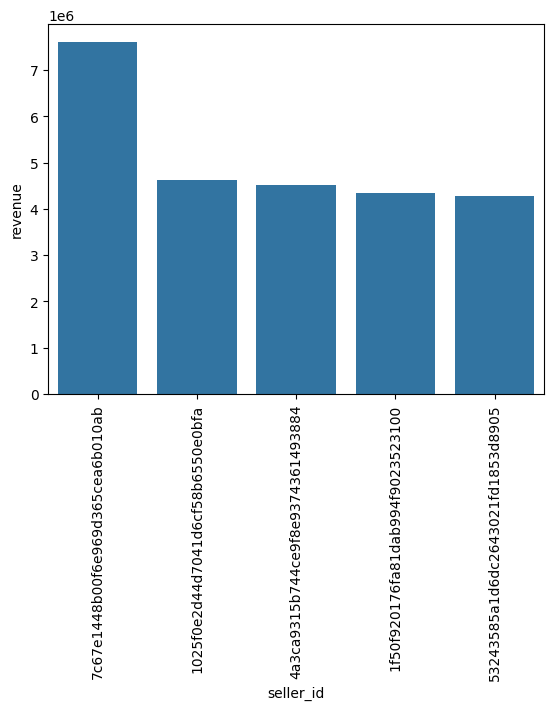

In [34]:
query = """select *, dense_rank() over(order by revenue desc) as rn from
(select orders_items.seller_id, sum(payments.payment_value)
revenue from orders_items join payments
on orders_items.order_id = payments.order_id
group by orders_items.seller_id) as a"""
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns= ["seller_id", "revenue", "ranks"])
df.head()
df= df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()


# Calculate the moving average of order values for each customer over their order history.

In [8]:
query = """
SELECT 
    o.customer_id,
    o.order_purchase_timestamp,
    SUM(p.payment_value) AS order_value,
    AVG(SUM(p.payment_value)) OVER (
        PARTITION BY o.customer_id
        ORDER BY o.order_purchase_timestamp
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS moving_avg
FROM orders o
JOIN payments p ON o.order_id = p.order_id
GROUP BY o.customer_id, o.order_purchase_timestamp
ORDER BY o.customer_id, o.order_purchase_timestamp;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Customer_id", "Order_Timestamp", "Order_Value", "Moving_Avg"])
df.head(10)

,Customer_id,Order_Timestamp,Order_Value,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,3442.2,3442.2
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,2022.3,2022.3
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,5862.6,5862.6
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,5380.5,5380.5
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,3210.3,3210.3
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,2154.0,2154.0
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,1482.0,1482.0
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,4997.7,4997.7
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,2556.9,2556.9
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,37671.3,37671.3


# Calculate the cumulative sales per month for each year.

In [12]:
query = """select years, months, payment, sum(payment)
over(order by years, months) cumulative_sales
from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders
join payments on 
orders.order_id = payments.order_id
group by years, months order by years, months) as a"""

cur.execute(query)
data = cur.fetchall()

# Add column names
df = pd.DataFrame(data, columns=["Year", "Month", "Monthly_Sales", "Cumulative_Sales"])

# Preview the result
df.head()

,Year,Month,Monthly_Sales,Cumulative_Sales
0,2016,9,7567.2,7567.2
1,2016,10,1772714.4,1780281.6
2,2016,12,588.6,1780870.2
3,2017,1,4154641.2,5935511.4
4,2017,2,8757240.3,14692751.7


# Calculate the year-over-year growth rate of total sales.

In [20]:
query = """with a as (select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders
join payments on 
orders.order_id = payments.order_id
group by years order by years)
select yearS, ((payment - lag(payment,1) over(order by years))/
lag(payment,1) over(order by years))*100 from a"""

cur.execute(query)
data = cur.fetchall()

# Add column names
df = pd.DataFrame(data, columns=["Year", "yoy % growth"])

# Preview the result
df.head()

,Year,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [29]:
query = """
WITH first_orders AS (
    SELECT 
        c.customer_id,
        MIN(o.order_purchase_timestamp) AS first_order
    FROM customer c
    JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY c.customer_id
),
repeat_orders AS (
    SELECT 
        f.customer_id,
        COUNT(DISTINCT o.order_id) AS next_order_count
    FROM first_orders f
    JOIN orders o 
        ON o.customer_id = f.customer_id
        AND o.order_purchase_timestamp > f.first_order
        AND o.order_purchase_timestamp < DATE_ADD(f.first_order, INTERVAL 6 MONTH)
    GROUP BY f.customer_id
)
SELECT 
    ROUND(
        100 * COUNT(DISTINCT r.customer_id) / COUNT(DISTINCT f.customer_id),
        2
    ) AS six_month_retention_rate
FROM first_orders f
LEFT JOIN repeat_orders r ON f.customer_id = r.customer_id
WHERE r.next_order_count > 0;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["6_Month_Retention_Rate"])
df

,6_Month_Retention_Rate
0,None


# Identify the top 3 customers who spent the most money in each year.

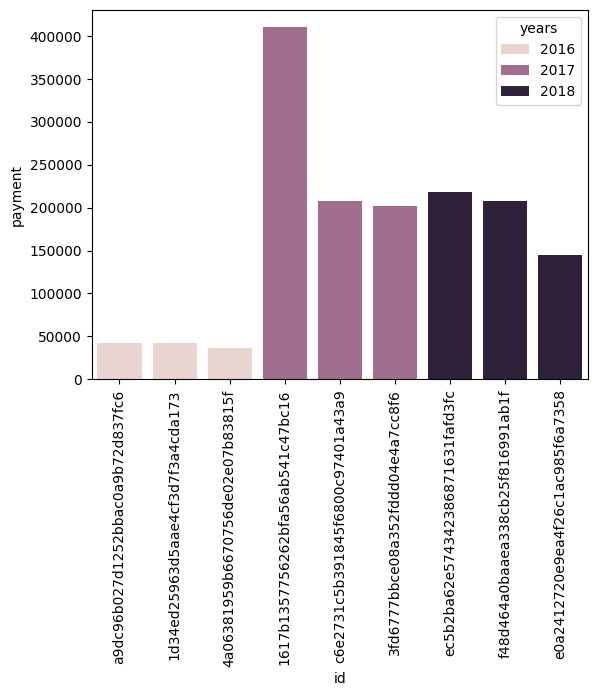

In [32]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id= orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["years", "id", "payment", "rank"])
sns.barplot(x = "id",y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()